In [1]:
import pandas

users_file = "yelp_dataset/yelp_academic_dataset_user.json"
review_file = "yelp_dataset/yelp_academic_dataset_review.json"
business_file = "yelp_dataset/yelp_academic_dataset_business.json"


In [2]:
business_table = pandas.read_json(business_file, orient='columns', lines=True)
business_table

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montr��al,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
6,631 Bloor St W,"{'BusinessParking': '{'garage': False, 'street...",9A2quhZLyWk0akUetBd8hQ,"Food, Bakeries",Toronto,None,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
7,"3417 Derry Road E, Unit 103","{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA


In [8]:
las_vegas_hotels = business_table.loc[business_table['city']=='Las Vegas',['business_id','name','categories']]
las_vegas_hotels = las_vegas_hotels.loc[las_vegas_hotels['categories'].str.contains('Restaurant|Food|Bar|Pub')==True,['name','categories']]
categories = las_vegas_hotels['categories']

categories_set = {}

for each_category in categories:
    for type_val in each_category.split(","):
        if type_val != 'Restaurants' and type_val != 'Food':
            type_val = type_val.strip().lower()
            if type_val in categories_set:
                categories_set[type_val] += 1
            else:
                categories_set[type_val] = 1

len(categories_set)
categories_set = dict([(k,v) for k,v in categories_set.items() if v > 2])
len(categories_set)
categories_set

with open("cusine_categories.txt","w+") as output_file:
    for k,v in categories_set.items():
        output_file.write(str(k) + "," + str(v) + "\n")


    
    


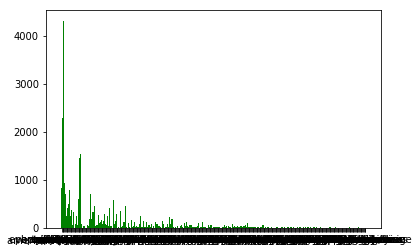

In [7]:
import numpy as np
import matplotlib.pyplot as plt

pos = np.arange(len(list(categories_set.keys())))
width = 1.0     

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(categories_set.keys())

plt.bar(list(categories_set.keys()), list(categories_set.values()), width, color='g')
#                           
plt.show()